# First Data Science Project
## Melbourne Housing Prices Prediction
Here, we will go through a data challenge using data predicting housing prices in Melbourne, Australia. 

The data is from Kaggle and can be found [here](https://www.kaggle.com/anthonypino/melbourne-housing-market)

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Collection

In [2]:
full_data = pd.read_csv("./data/Melbourne_housing_FULL.csv")

In [5]:
full_data.shape

(34857, 21)

In [3]:
full_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [6]:
full_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [8]:
full_data.Type.value_counts()
# Type:
# br - bedroom(s);
# h - house,cottage,villa, semi,terrace;
# u - unit, duplex;
# t - townhouse;
# dev site - development site;
# o res - other residential.

h    23980
u     7297
t     3580
Name: Type, dtype: int64

In [9]:
full_data.Rooms.value_counts()

3     15084
2      8332
4      7956
5      1737
1      1479
6       204
7        32
8        19
10        6
9         4
12        3
16        1
Name: Rooms, dtype: int64

In [10]:
full_data.Postcode.value_counts()

3073.0    844
3046.0    638
3020.0    617
3121.0    612
3165.0    583
         ... 
3428.0      1
3770.0      1
3786.0      1
3139.0      1
3159.0      1
Name: Postcode, Length: 211, dtype: int64

In [11]:
full_data.Car.value_counts()

2.0     12214
1.0      9164
0.0      1631
3.0      1606
4.0      1161
5.0       151
6.0       140
7.0        25
8.0        23
10.0        6
9.0         3
11.0        2
26.0        1
18.0        1
12.0        1
Name: Car, dtype: int64

In [13]:
full_data.YearBuilt.value_counts()

### Year 2106 needs to be corrected

1970.0    1490
1960.0    1260
1950.0    1089
1980.0     726
1900.0     606
          ... 
1830.0       1
2106.0       1
1897.0       1
1876.0       1
1879.0       1
Name: YearBuilt, Length: 160, dtype: int64

In [15]:
full_data.Regionname.value_counts()

Southern Metropolitan         11836
Northern Metropolitan          9557
Western Metropolitan           6799
Eastern Metropolitan           4377
South-Eastern Metropolitan     1739
Eastern Victoria                228
Northern Victoria               203
Western Victoria                115
Name: Regionname, dtype: int64

In [16]:
full_data.Propertycount.value_counts()

21650.0    844
8870.0     722
10969.0    583
14949.0    552
10412.0    491
          ... 
129.0        1
1588.0       1
5462.0       1
1160.0       1
342.0        1
Name: Propertycount, Length: 342, dtype: int64

In [19]:
#SellerG: Real Estate Agent
full_data.SellerG.value_counts()

Jellis             3359
Nelson             3236
Barry              3235
hockingstuart      2623
Marshall           2027
                   ... 
Clairmont             1
Buxton/Find           1
Harcourts/Barry       1
Silver                1
Methven               1
Name: SellerG, Length: 388, dtype: int64

In [20]:
full_data.Method.value_counts()
# Method:
# S - property sold;
# SP - property sold prior;
# PI - property passed in;
# PN - sold prior not disclosed;
# SN - sold not disclosed;
# NB - no bid;
# VB - vendor bid;
# W - withdrawn prior to auction;
# SA - sold after auction;
# SS - sold after auction price not disclosed.
# N/A - price or highest bid not available.

S     19744
SP     5095
PI     4850
VB     3108
SN     1317
PN      308
SA      226
W       173
SS       36
Name: Method, dtype: int64

## 2. Cleaning

#### Removing the duplicates

In [26]:
full_data = full_data[~full_data.duplicated()]

#### Checking missing values

In [32]:
for col in full_data.columns:
    print(col, sum(full_data.loc[:, col].isnull()))

Suburb 0
Address 0
Rooms 0
Type 0
Price 7609
Method 0
SellerG 0
Date 0
Distance 1
Postcode 1
Bedroom2 8217
Bathroom 8226
Car 8728
Landsize 11810
BuildingArea 21115
YearBuilt 19306
CouncilArea 3
Lattitude 7976
Longtitude 7976
Regionname 3
Propertycount 3


#### Rows with missing price values are removed

In [39]:
data = full_data.dropna( how='any', subset=['Price'])

In [40]:
#missing values
for col in data.columns:
    print(col, sum(data.loc[:, col].isnull()))

Suburb 0
Address 0
Rooms 0
Type 0
Price 0
Method 0
SellerG 0
Date 0
Distance 1
Postcode 1
Bedroom2 6441
Bathroom 6447
Car 6824
Landsize 9265
BuildingArea 16591
YearBuilt 15163
CouncilArea 3
Lattitude 6254
Longtitude 6254
Regionname 3
Propertycount 3


#### Encoding

In [41]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

In [42]:
le = LabelEncoder()  #instantiate the Label Encoder
data['Type'] = le.fit_transform(data['Type'])

C:\Users\DAnand\AppData\Local\Temp\ipykernel_1676\3139637655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Type'] = le.fit_transform(data['Type'])


## 3. Exploratory Analysis

In [43]:
import seaborn as sns

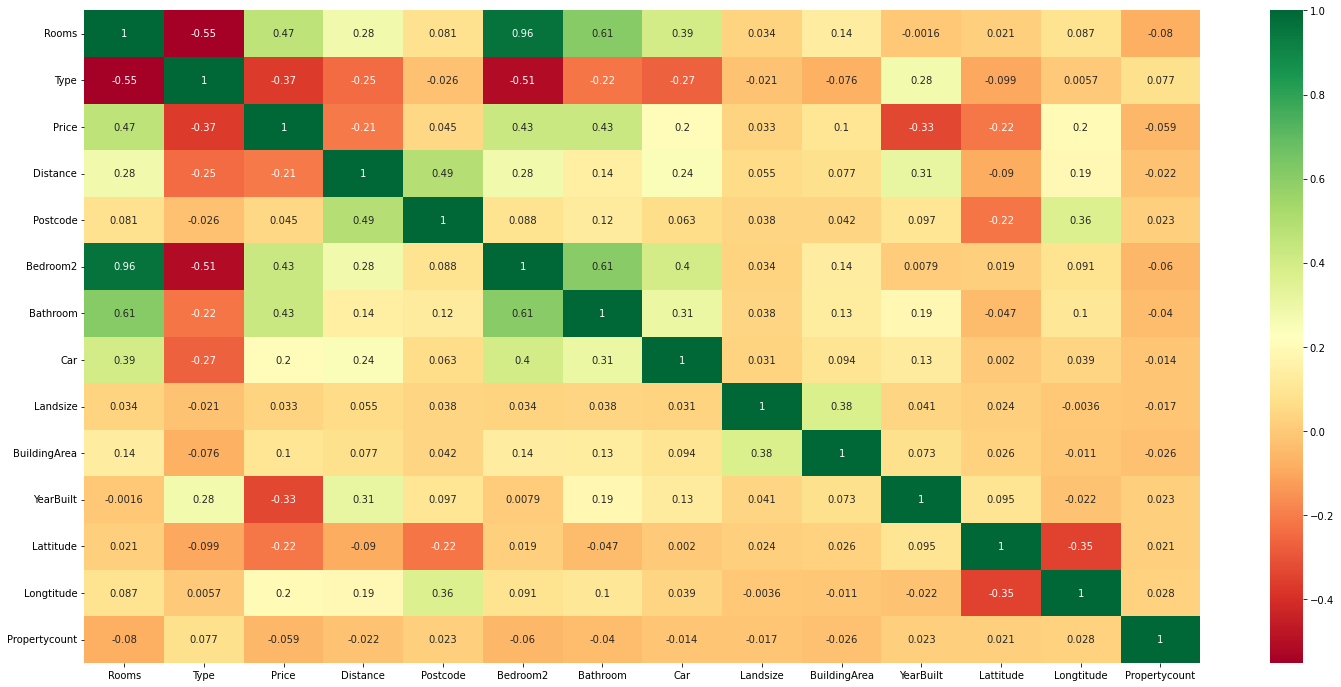

In [44]:

#get correlations of each features in dataset
corrmat = data.corr()   #get correlations table
top_corr_features = corrmat.index
plt.figure(figsize=(25,12))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
full_data.Type.value_counts()

## 4. Model Building

## 5. Iterating